In [1]:
# This section enables to use the module code referenced in the repo
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
# Imports for the excercise
import pandas as pd 
import logging
import numpy as np
from arcus.azureml.environment.environment_factory import WorkEnvironmentFactory as fac

from sklearn.model_selection import train_test_split
from sklearn import linear_model


## Connecting to a remote AzureML environment

In [3]:
azure_config_file = '../.azureml/config.json'
work_env = fac.Create(connected=True, datastore_path='arcus_partition_test', config_file=azure_config_file)


Connected to AzureML workspace
>> Name: codit-ai-incubators-ml
>> Subscription: c1537527-c126-428d-8f72-1ac9f2c63c1f
>> Resource group: codit-ai-incubators


## Loading a partitioned dataframe

In [4]:
#partition_df = work_env.load_tabular_partition('test-partitioning/stock_AT*', columns=['Close', 'High', 'Isin', 'ItemDate', 'Low', 'Market', 'Open', 'Ticker', 'Volume'])

In [5]:
#display(partition_df)

## Starting an experiment with runs and logging to it

In [6]:
trainer = work_env.start_experiment('arcus-sample01')
idx = 0

In [7]:
idx += 1
_run = trainer.new_run('Run' + str(idx))

## Build simple classification model

In [8]:
df = pd.read_csv('../tests/resources/datasets/student-admission.csv')
y = df.Admission.values
X = np.asarray(df.drop(['Admission'],axis=1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# trainen van de logistic regression classifier
logreg = linear_model.LogisticRegression(C=1e5,solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

              precision    recall  f1-score   support

           0       0.73      1.00      0.85        11
           1       1.00      0.79      0.88        19

    accuracy                           0.87        30
   macro avg       0.87      0.89      0.86        30
weighted avg       0.90      0.87      0.87        30

[[11  0]
 [ 4 15]]
Accuracy score: 86.66666666666667


array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1])

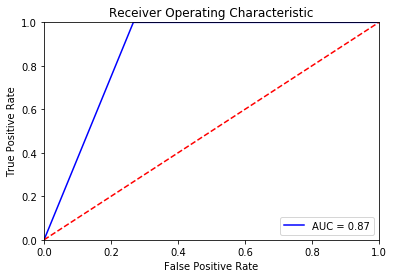

In [9]:
trainer.evaluate_classifier(logreg, X_test, y_test, True)